# EDA Bank dataset

En este notebook se realiza un Análisis Exploratorio de los Datos (EDA) del dataset `bank-additional`, una vez finalizada la limpieza e imputación de valores nulos.

In [1]:
#Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#Exploracion de archivos
import sys
sys.path.append('../')

#Funciones personalizadas
from src import soporte_visualizacion as spv 

In [2]:
df_o = pd.read_csv('../data/processed/02.data_limpios_no_nulos_bank.csv', index_col=0, parse_dates=['date'])

In [3]:
df = df_o.copy()

## Análisis de la variable objetivo `y`

In [4]:
target_summary = pd.DataFrame({
    'count': df['y'].value_counts(),
    'percentage': df['y'].value_counts(normalize=True) * 100
}).round(2)

target_summary



,count,percentage
y,,
False,37941,88.75
True,4811,11.25


Lo vemos gráficamente mediante un countplot

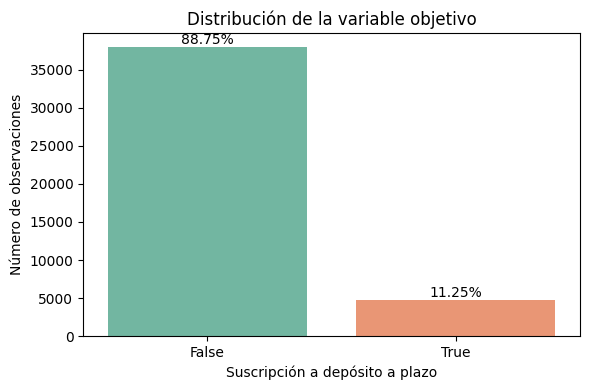

In [5]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(
    x='y',
    hue='y',
    data=df,
    palette='Set2',
    legend=False
)

total = len(df)

for p in ax.patches:
    porcentaje = 100 * p.get_height() / total
    ax.annotate(
        f'{porcentaje:.2f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title('Distribución de la variable objetivo')
plt.xlabel('Suscripción a depósito a plazo')
plt.ylabel('Número de observaciones')
plt.tight_layout()
plt.show()


Aquí vemos que que la mayoría de los clientes no contratan el producto, ya que el 88.75% de las observaciones pertenecen a la clase False, mientras que solo el 11.25% corresponden a la clase True.

## Histograma de age
Analizamos como se distribuye la edad de los clientes contactados en la campaña

- Variable analizada: 
    - `age`-> edad del cliente



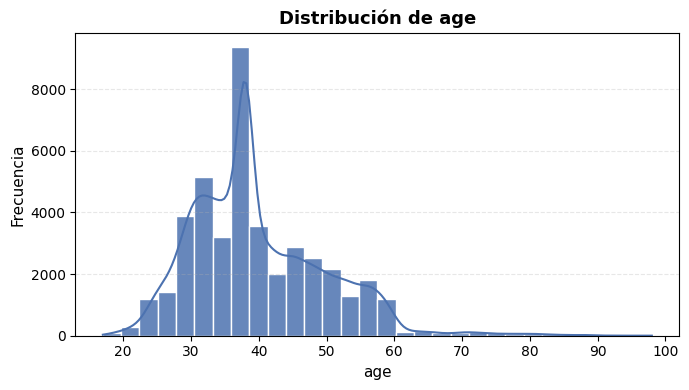

In [6]:
spv.plot_hist(df,['age'])

La distribución de la variable `age` muestra una mayor concentración de clientes en edades adultas, con un pico aproximado entre los 30 y 50 años.

## Análisis variables numéricas

Vamos a analizar lo siguiente:

- La duración de las llamadas entre clientes que contratan y los que no.
- Si influye el número de contactos realizados en la probabilidad de suscripción.
- Si influye el historial de contactos previos en la probabilidad de suscripción.

- Variables analizadas:
    - duration -> duración de la llamada (en segundos)
    - campaign -> número de contactos realizados durante la campaña actual
    - previous -> número de veces que se ha contactado al cliente antes de esta campaña
    - y -> variable objetivo (suscripción)

In [7]:
num_cols = ['duration', 'campaign', 'previous']
title_map = {
    'duration': 'Duración de la llamada según suscripción',
    'campaign': 'Número de contactos en la campaña según suscripción',
    'previous': 'Contactos previos según suscripción'
}
ylabel_map = {
    'duration': 'Duración de la llamada (segundos)',
    'campaign': 'Número de contactos en la campaña',
    'previous': 'Número de contactos previos'
}


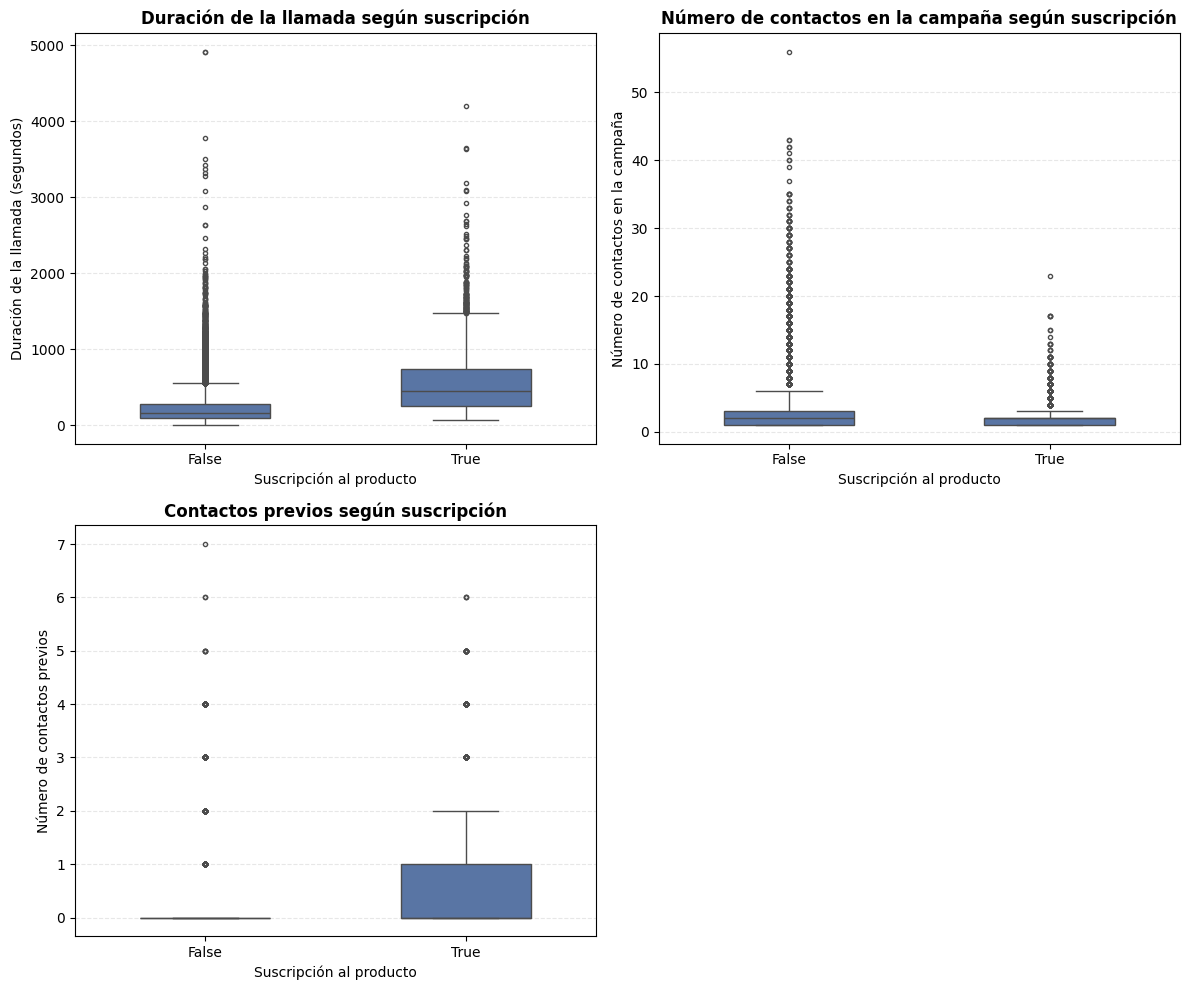

In [8]:
spv.plot_box_vs_target(
    df=df,
    num_cols=num_cols,
    target='y',
    title_map=title_map,
    xlabel='Suscripción al producto',
    ylabel_map=ylabel_map
)


## Interpretación:

- La duración de la llamada muestra una diferencia clara entre clientes que suscriben el producto y los que no. Las llamadas asociadas a una suscripción exitosa tienden a ser más largas. En ambos grupos se aprecia la presencia de numerosos valores atípicos, lo que indica que existen llamadas excepcionalmente largas tanto en clientes que suscriben como en los que no.
- El número de contactos realizados durante la campaña actual no presenta diferencias relevantes entre clientes que suscriben y los que no, lo que indica que insistir más veces no aumenta necesariamente la probabilidad de éxito. Ambos grupos presentan una distribución similar, con presencia de outliers que reflejan casos de clientes contactados un número elevado de veces
- El historial de contactos previos muestra una mayor dispersión entre los clientes que sí suscriben el producto. En el grupo que no suscribe, los valores se concentran más en niveles bajos de contactos previos. Tanto en los clientes que suscriben el producto como en los que no, se observa la presencia de valores atípicos, reflejando casos con un número elevado de contactos previos.

## Análisis variables categóricas.

Vamos a analizar lo siguiente:

- Qué categorías presentan una mayor tasa de suscripción al producto.
- Si existen diferencias relevantes en la probabilidad de suscripción según el perfil del cliente.
- Si variables operativas de la campaña, como el canal o el momento del contacto, influyen en el resultado.
- Si el resultado de campañas anteriores afecta a la probabilidad de suscripción actual.


- Variables analizadas:
    - job -> profesión del cliente
    - education -> nivel educativo
    - marital -> estado civil
    - contact -> método de contacto
    - contact_month -> mes cliente contactado
    - poutcome -> resultado de la campaña de marketing anterior
    - y -> variable objetivo

In [9]:
cat_cols = ['job', 'marital', 'education', 'contact', 'contact_month', 'poutcome']
title_map = {
    'job': 'Tasa de suscripción según ocupación',
    'marital': 'Tasa de suscripción según estado civil',
    'education': 'Tasa de suscripción según nivel educativo',
    'contact': 'Tasa de suscripción según tipo de contacto',
    'contact_month': 'Tasa de suscripción según mes de contacto',
    'poutcome': 'Tasa de suscripción según resultado de campañas previas'
}



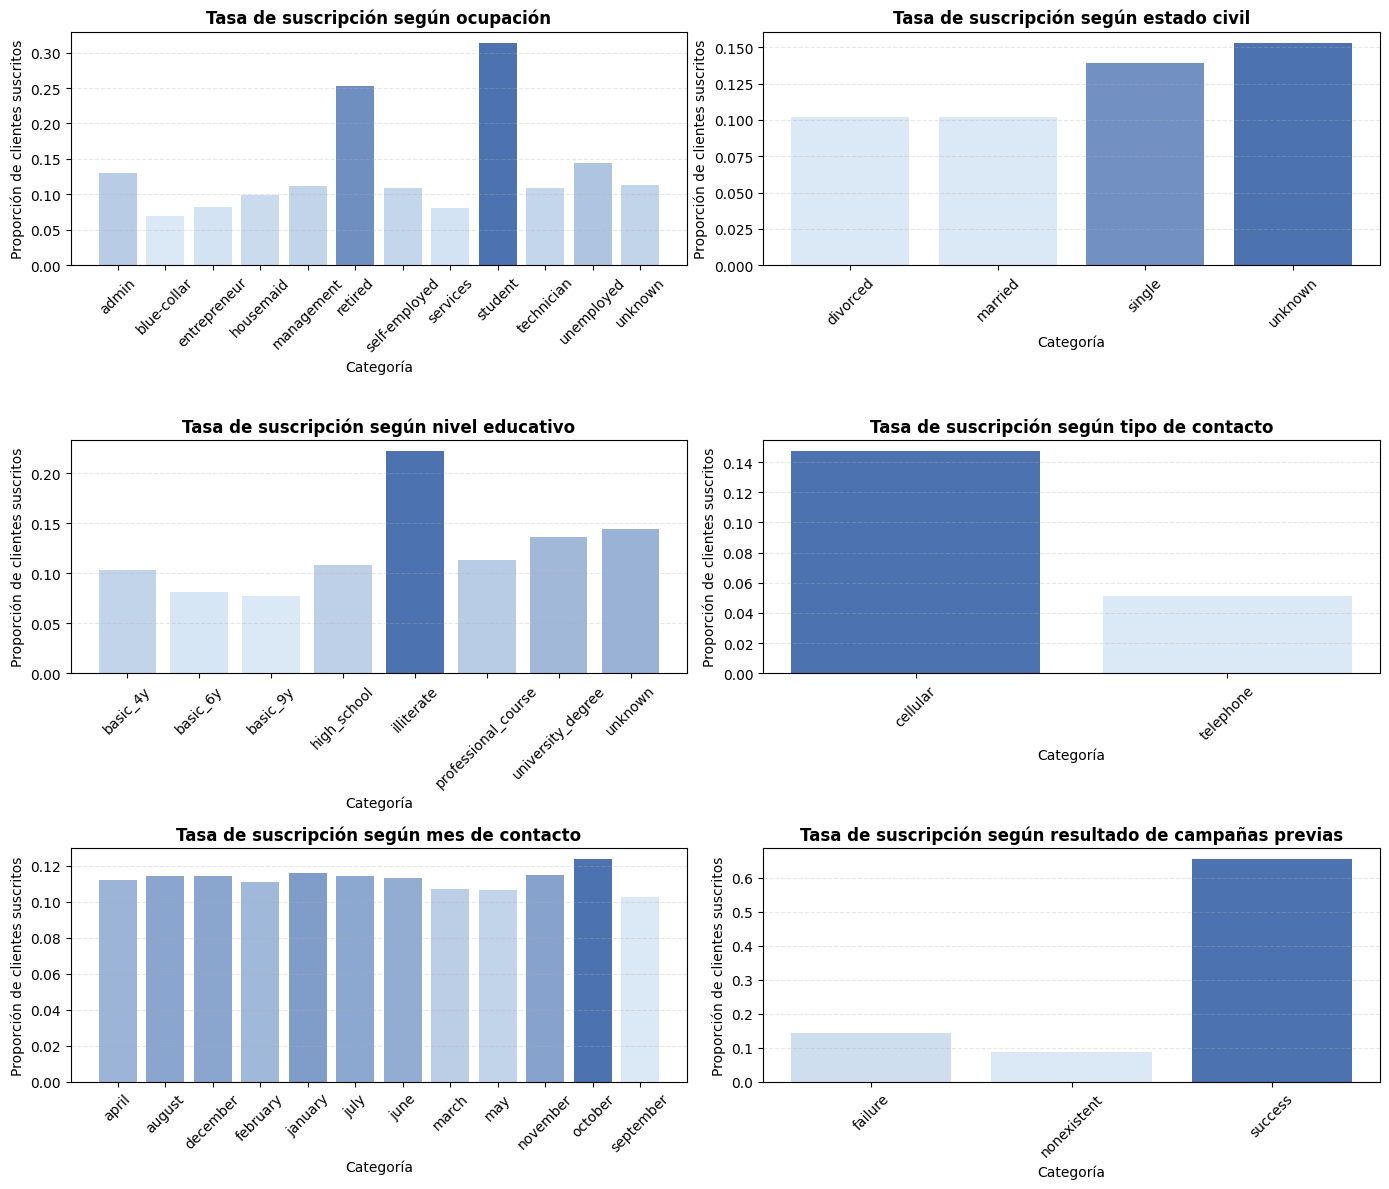

In [10]:
spv.plot_bar_rate(
    df,
    cat_cols,
    target='y',
    title_map=title_map,
    xlabel='Categoría',
    ylabel='Proporción de clientes suscritos'
)


## Interpretación:
- **Perfil del cliente:** estudiantes, clientes con estado civil unknown o single, y el grupo educativo illiterate muestran tasas de suscripción más altas.
- **Canal y momento de contacto:** el contacto vía cellular es más efectivo, y octubre destaca ligeramente entre los meses.
- **Historial de campañas:** los clientes con campañas previas exitosas (success) presentan la mayor probabilidad de suscripción, siendo el factor más relevante observado.

## Evolución temporal por contact_year

Analizamos como evoluciona la tasa de suscripción a lo largo del tiempo

- Variables analizadas:
    - contact_year: año de contacto
    - y: variable objetivo



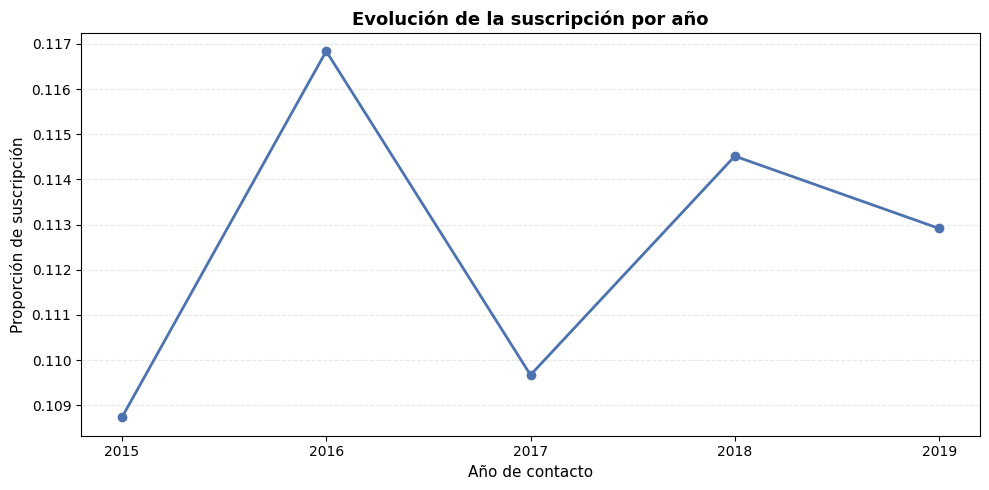

In [11]:
spv.plot_time_evolution(
    df=df,
    time_col='contact_year',
    target='y',
    title='Evolución de la suscripción por año',
    xlabel='Año de contacto',
    ylabel='Proporción de suscripción'
)


La tasa de suscripción varía entre distintos años, lo que permite analizar tendencias temporales y cambios en el comportamiento de los clientes.

## Análisis: Variables macroeconómicas vs y
Vamos a analizar lo siguiente:
- Si influye el contexto macroeconómico en la probabilidad de suscripción
- Si existen diferencias en las variables económicas entre clientes que suscriben y los que no.

- Variables analizadas: 
    - emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed
    - y → variable objetivo (suscripción al producto)

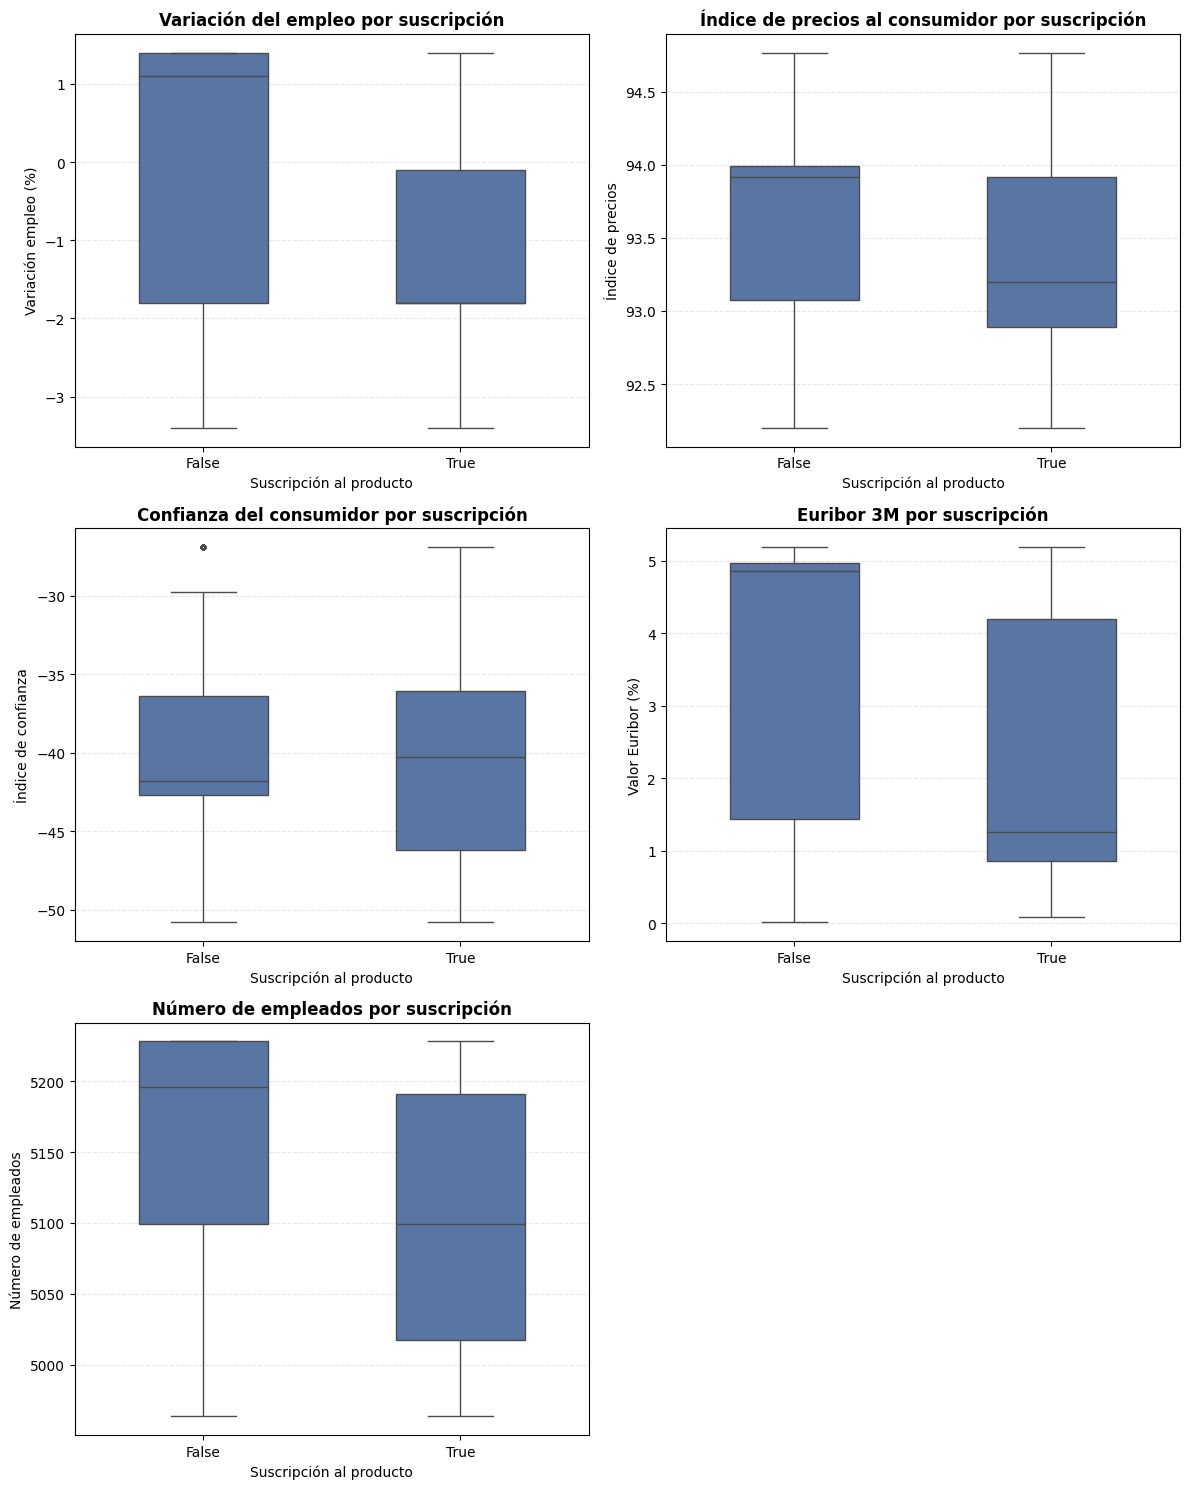

In [14]:
macro_cols = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
title_map = {
    'emp_var_rate': 'Variación del empleo por suscripción',
    'cons_price_idx': 'Índice de precios al consumidor por suscripción',
    'cons_conf_idx': 'Confianza del consumidor por suscripción',
    'euribor3m': 'Euribor 3M por suscripción',
    'nr_employed': 'Número de empleados por suscripción'
}

ylabel_map = {
    'emp_var_rate': 'Variación empleo (%)',
    'cons_price_idx': 'Índice de precios',
    'cons_conf_idx': 'Índice de confianza',
    'euribor3m': 'Valor Euribor (%)',
    'nr_employed': 'Número de empleados'
}

spv.plot_box_vs_target(
    df=df,
    num_cols=macro_cols,
    target='y',
    title_map=title_map,
    xlabel='Suscripción al producto',
    ylabel_map=ylabel_map
)


Se aprecian diferencias en la distribución de algunas variables macroeconómicas entre clientes que suscriben y los que no, lo que indica que el contexto económico puede influir en la respuesta a la campaña.

## Heatmap de correlaciones (variables numéricas)

Analizaremos las relaciones entre variables numéricas.

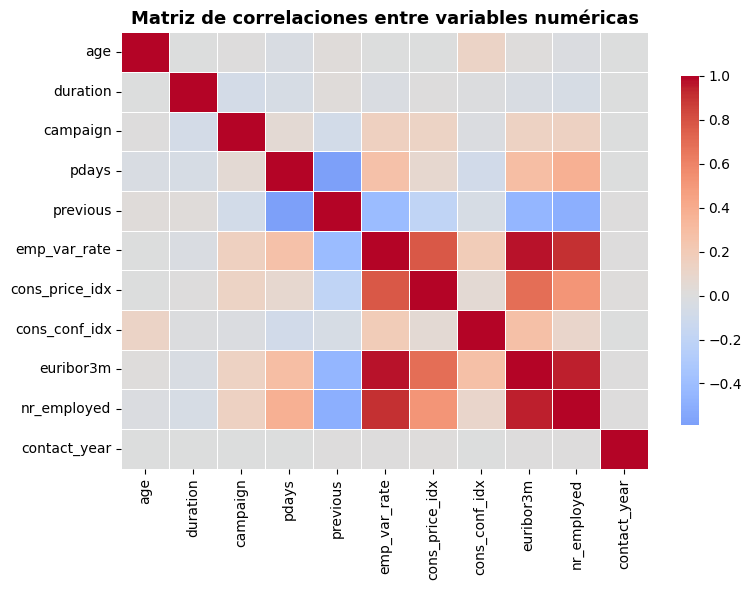

In [12]:
spv.plot_corr_heatmap(df)


Se observan correlaciones relevantes entre algunas variables macroeconómicas y de campaña.